# Try plotting CRW shape VS equivalent conic shape

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0,"../..")
from equation6 import Shell
import matplotlib

/Users/will/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The problematic stuff occurs at very low values for $\xi$

Condition for $x_0<0$ in ellipses: $B^2<A$

In [2]:
def B(beta,xi):
    """
    Perpendicular radius to symmetry axis
    """
    numerator = 3*xi*(1.0+np.sqrt(beta))**2
    denominator = (1.0-xi*beta)**2*(1+0.2*xi*beta)
    return np.sqrt(numerator/denominator)
    

In [38]:
def A(beta,xi):
    """
    Radius of curvature at symmetry axis
    """
    k = 2*(1./xi-1.)
    sb = np.sqrt(beta)
    gamma = (1. + 2*sb*(1 + 0.1*(1. - sb)-(3/40.)*k/(1+sb)))/6.
    return 1./(1-2*gamma)

## Plot $A-B^2$ VS $\beta$ for different $\xi$

In [4]:
sns.set_context("poster")

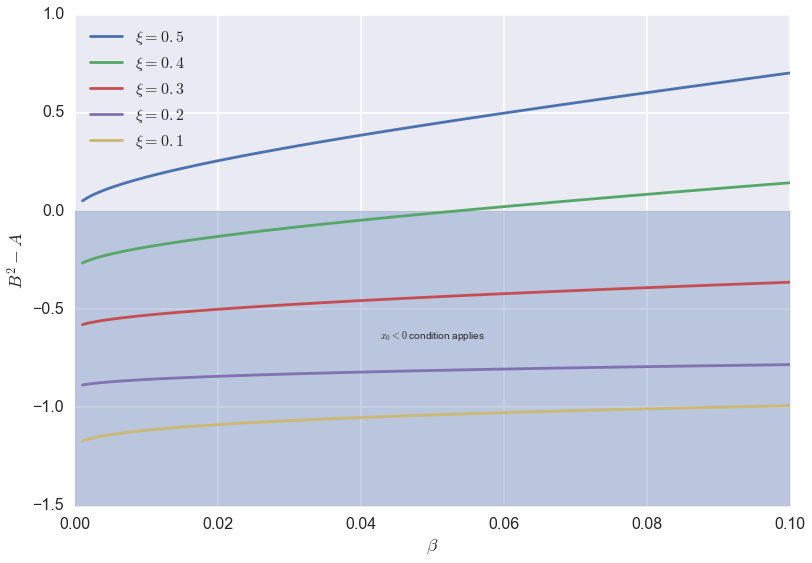

In [5]:
b_arr = np.logspace(-3,-1)
xi_arr = [0.5,0.4,0.3,0.2,0.1]
for x in xi_arr:
    plt.plot(b_arr,(B(b_arr,x))**2-A(b_arr,x),label=r"$\xi={}$".format(x))
#plt.plot([0.0,0.2],[45,45],"--")
plt.legend(loc="best")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$B^2-A$")
plt.fill_between([0.0,0.1],-1.5,alpha=0.3)
plt.xlim(0.0,0.1)
plt.text(0.05,-0.65,r"$x_0<0$ condition applies",ha="center");

## Making of a CRW shell which "works" $(B^2-A>0)$

In [18]:
theta=np.linspace(0,2*np.pi/3)
shell00=Shell(beta=0.01,innertype="anisotropic",xi=0.5)
R00=shell00.radius(theta)
R00[R00<=0] =np.nan
x00 = R00*np.cos(theta)
y00 = R00*np.sin(theta)

In [19]:
theta[:3], R00[:3]

(array([ 0.        ,  0.04274276,  0.08548551]),
 array([ 0.09090909,  0.09092465,  0.09097135]))

## Calculate radius of curvature

We want to check the analytic caclulation we have for the radius of curvature on the axis.  So we calculate $R_c$ from the numerical second derivative, $\ddot{R}$ as follows:


$$ \frac{R_c}{R_0} = \left(\frac{\ddot{R}}{R_0} - 1   \right)^{-1}$$

In [46]:
dth = 0.005
theta = np.arange(3)*dth
R = shell00.radius(theta)
theta, R

(array([ 0.   ,  0.005,  0.01 ]),
 array([ 0.09090909,  0.0909093 ,  0.09090994]))

In [47]:
def second_derivative(y, x):
    """Find d^2 y / d x^2 for regular grids y(x)"""
    return np.diff(y, 2) / np.diff(x[:-1])**2
    

In [48]:
second_derivative( [0, 1, 4, 9, 16, 25], [0, 1, 2, 3, 4, 5])

array([ 2.,  2.,  2.,  2.])

In [49]:
R0 = R[0]
Rddot = second_derivative(R, theta)
AA = 1.0/np.abs(Rddot/R0 - 1.0)
AA[0], A(0.01, 0.5)

(1.2304260752821732, 1.658124811576726)

## Making the "conic equivalent"

In [7]:
A00 = A(0.01,0.5)
B00 = B(0.01,0.5)
R0 = R00[0]
a = R0*A00/(2*A00-B00**2)
b = A00*R0/np.sqrt(np.abs(2*A00-B00**2))
t = np.linspace(-np.pi,np.pi,500)
x000 = a - R0
xe00,ye00 = a*np.cos(t) -x000,b*np.sin(t)

## Plot stuff

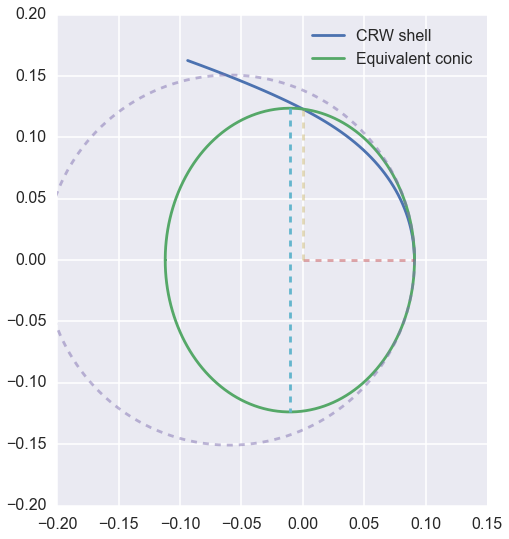

In [9]:
plt.plot(x00,y00,label="CRW shell")
plt.plot(xe00,ye00,label="Equivalent conic")
plt.plot([0.0,R0],[0.0,0.0],"--",alpha=0.5)
plt.plot(R0*A00*np.cos(t)-A00*R0+R0,R0*A00*np.sin(t),"--",alpha=0.5)
plt.plot([0.0,0.0],[0.0,R0*B00],"--",alpha=0.5)
plt.plot([-x000,-x000],[b,-b],"--")
plt.legend()
plt.xlim(-0.2,0.15)
plt.ylim(-0.2,0.2)
plt.gca().set_aspect("equal",adjustable="box");

Looks Like the oblate shapes are not very adequate. Neverthless, let's try a shape with $x_0<0$

Zoom in on the previous graph

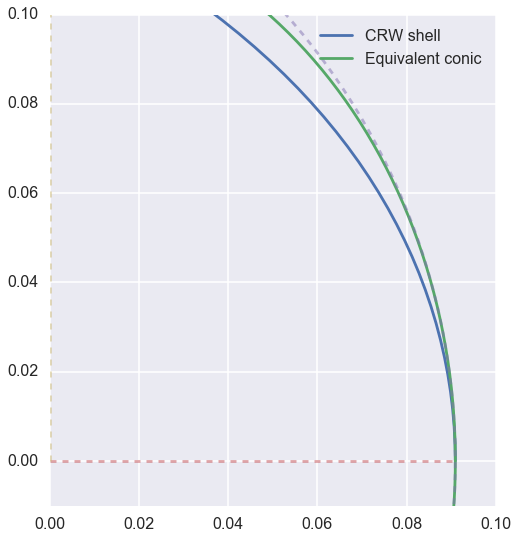

In [8]:
plt.plot(x00,y00,label="CRW shell")
plt.plot(xe00,ye00,label="Equivalent conic")
plt.plot([0.0,R0],[0.0,0.0],"--",alpha=0.5)
plt.plot(R0*A00*np.cos(t)-A00*R0+R0,R0*A00*np.sin(t),"--",alpha=0.5)
plt.plot([0.0,0.0],[0.0,R0*B00],"--",alpha=0.5)
plt.plot([-x000,-x000],[b,-b],"--")
plt.legend()
plt.xlim(-0.0,0.1)
plt.ylim(-0.01,0.1)
plt.gca().set_aspect("equal",adjustable="box");

## CRW shape with $(B^2-A < 0)$

In [10]:
shell01=Shell(beta=0.01,innertype="anisotropic",xi=0.3)
R01=shell01.radius(theta)
R01[R01<=0] =np.nan
x01 = R01*np.cos(theta)
y01 = R01*np.sin(theta)

## Making the "conic equivalent"

In [11]:
A01 = A(0.01,0.3)
B01 = B(0.01,0.3)
R1 = R01[0]
a1 = R1*A01/(2*A01-B01**2)
b1 = A01*R1/np.sqrt(np.abs(2*A01-B01**2))
x001 = a1 - R1
xe01,ye01 = a1*np.cos(t) -x001,b1*np.sin(t)

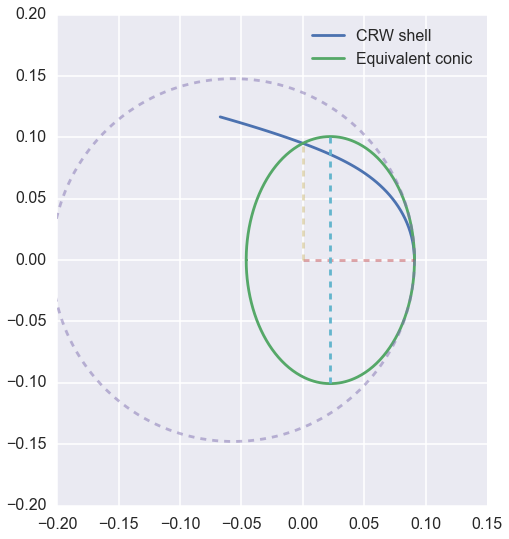

In [12]:
plt.plot(x01,y01,label="CRW shell")
plt.plot(xe01,ye01,label="Equivalent conic")
plt.plot([0.0,R1],[0.0,0.0],"--",alpha=0.5)
plt.plot(R1*A01*np.cos(t)-A01*R1+R1,R1*A01*np.sin(t),"--",alpha=0.5)
plt.plot([0.0,0.0],[0.0,R1*B01],"--",alpha=0.5)
plt.plot([-x001,-x001],[b1,-b1],"--")
plt.legend()
plt.xlim(-0.2,0.15)
plt.ylim(-0.2,0.2)
plt.gca().set_aspect("equal",adjustable="box");

## Finally an oblate shape

In [13]:
shell02=Shell(beta=0.01,innertype="anisotropic",xi=0.8)
R02=shell02.radius(theta)
R02[R02<=0] =np.nan
x02 = R02*np.cos(theta)
y02 = R02*np.sin(theta)

In [14]:
A02 = A(0.01,0.8)
B02 = B(0.01,0.8)
R2 = R02[0]
a2 = R2*A02/(2*A02-B02**2)
b2 = A02*R2/np.sqrt(np.abs(2*A02-B02**2))
x002 = a2 - R2
xe02,ye02 = a2*np.cos(t) -x002,b2*np.sin(t)

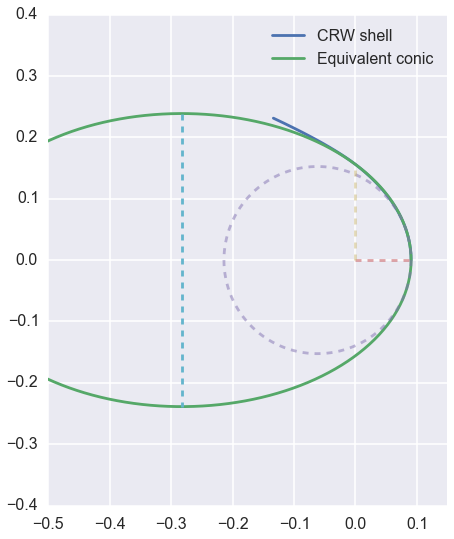

In [15]:
plt.plot(x02,y02,label="CRW shell")
plt.plot(xe02,ye02,label="Equivalent conic")
plt.plot([0.0,R2],[0.0,0.0],"--",alpha=0.5)
plt.plot(R2*A02*np.cos(t)-A02*R2+R2,R2*A02*np.sin(t),"--",alpha=0.5)
plt.plot([0.0,0.0],[0.0,R2*B02],"--",alpha=0.5)
plt.plot([-x002,-x002],[b2,-b2],"--")
plt.legend()
plt.xlim(-0.5,0.15)
plt.ylim(-0.4,0.4)
plt.gca().set_aspect("equal",adjustable="box");

Looks like for low $\xi$ (or high $k$), the radius of curvature calculation becomes more inaccurate. Need to check it again